CHAPTER : 05 ANALYZING CATEGORIES WITH FACET GRIDS

In [1]:
import pandas as pd
import numpy as np

In [2]:
water_pol_data = pd.read_csv('water data.csv', encoding='ISO-8859-1')

In [3]:
water_pol_data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

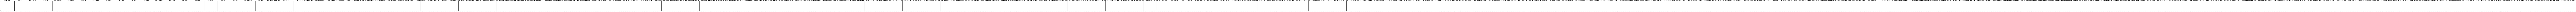

In [5]:
facet = sns.FacetGrid(water_pol_data, col = 'STATE')
plt.show()

In [6]:
wtr_data = water_pol_data[:25]

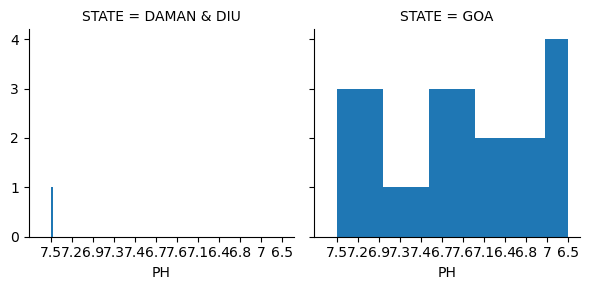

In [7]:
facet = sns.FacetGrid(wtr_data, col = 'STATE')
facet.map(plt.hist,"PH")
plt.show()

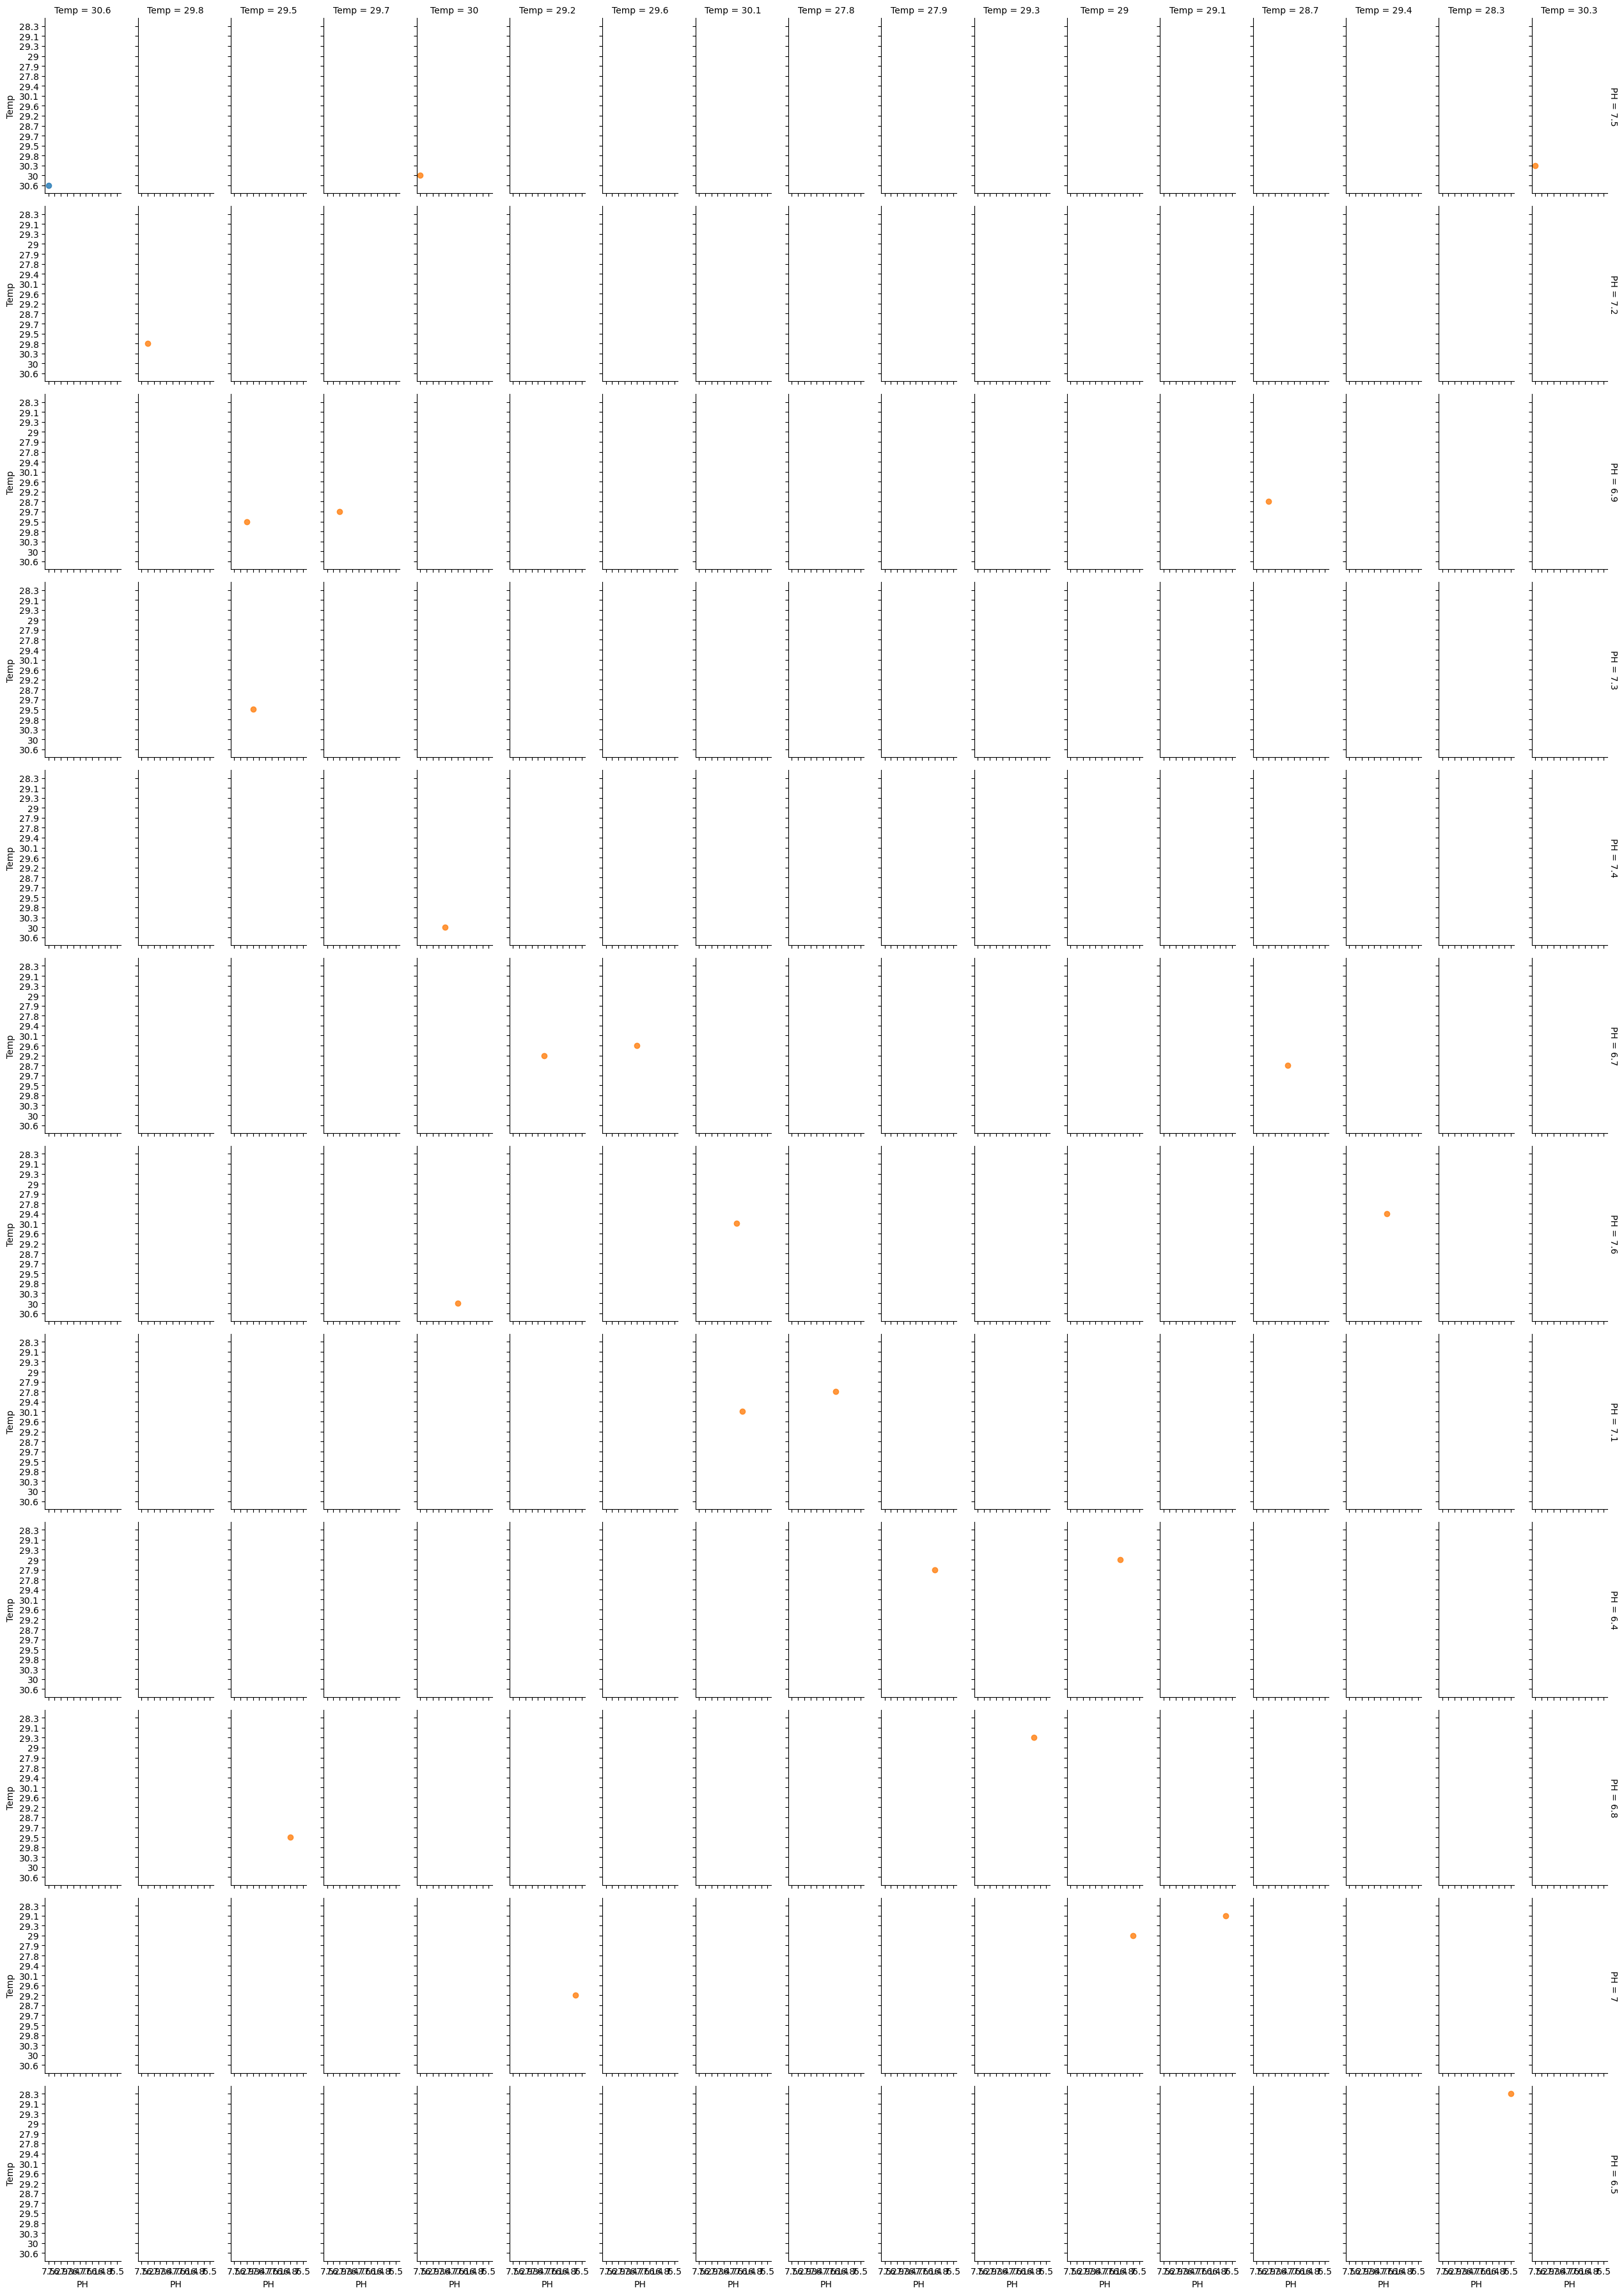

In [8]:
facet = sns.FacetGrid(wtr_data, row = 'PH', aspect = 0.5,
                     col = 'Temp', hue = 'STATE', margin_titles = True)
facet.map(sns.regplot, "PH", "Temp", fit_reg = False)
plt.show()

In [9]:
water_pol_data["FECAL COLIFORM (MPN/100ml)"] = pd.to_numeric(water_pol_data["FECAL COLIFORM (MPN/100ml)"], errors='coerce')
water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"] = pd.to_numeric(water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"], errors='coerce')

In [10]:
print(water_pol_data["FECAL COLIFORM (MPN/100ml)"].dtype)
print(water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"].dtype)

float64
float64


In [11]:
print(water_pol_data["FECAL COLIFORM (MPN/100ml)"].isna().sum())
print(water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"].isna().sum())

316
132


In [12]:
water_pol_data = water_pol_data.dropna(subset=["FECAL COLIFORM (MPN/100ml)", "TOTAL COLIFORM (MPN/100ml)Mean"])
water_pol_data["FECAL COLIFORM (MPN/100ml)"].fillna(water_pol_data["FECAL COLIFORM (MPN/100ml)"].mean(), inplace=True)
water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(water_pol_data["TOTAL COLIFORM (MPN/100ml)Mean"].mean(), inplace=True)

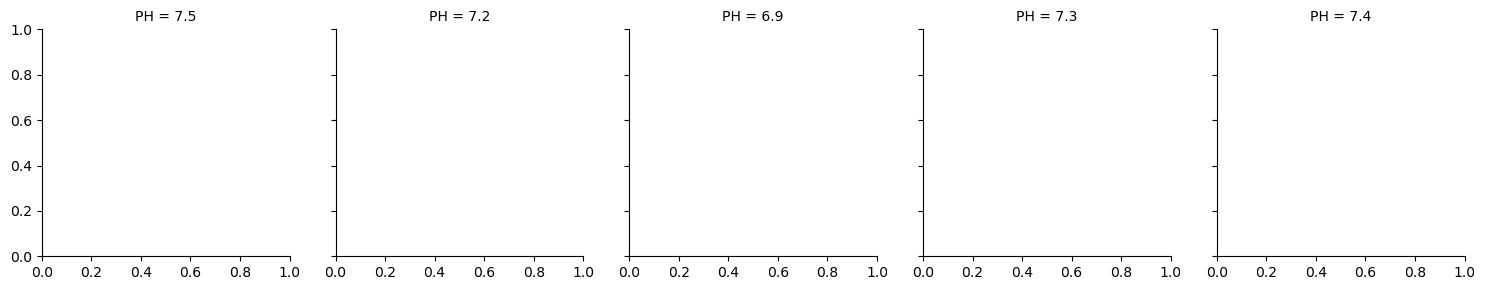

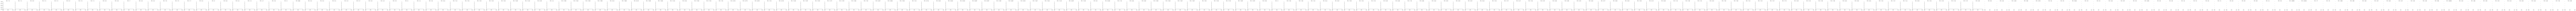

In [16]:
subset_data = water_pol_data[water_pol_data['PH'].isin(water_pol_data['PH'].unique()[:5])]
facet = sns.FacetGrid(subset_data, col="PH", height=3)
facet = sns.FacetGrid(water_pol_data, col="PH", height=2, aspect=1)

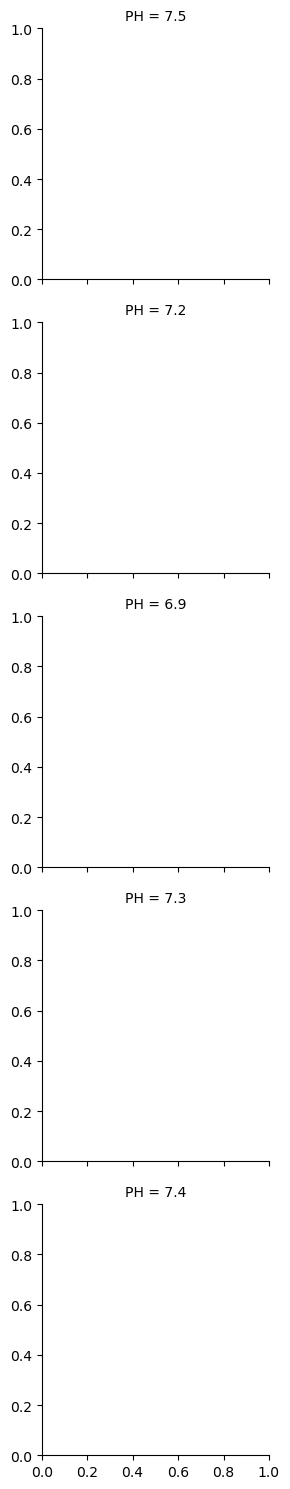

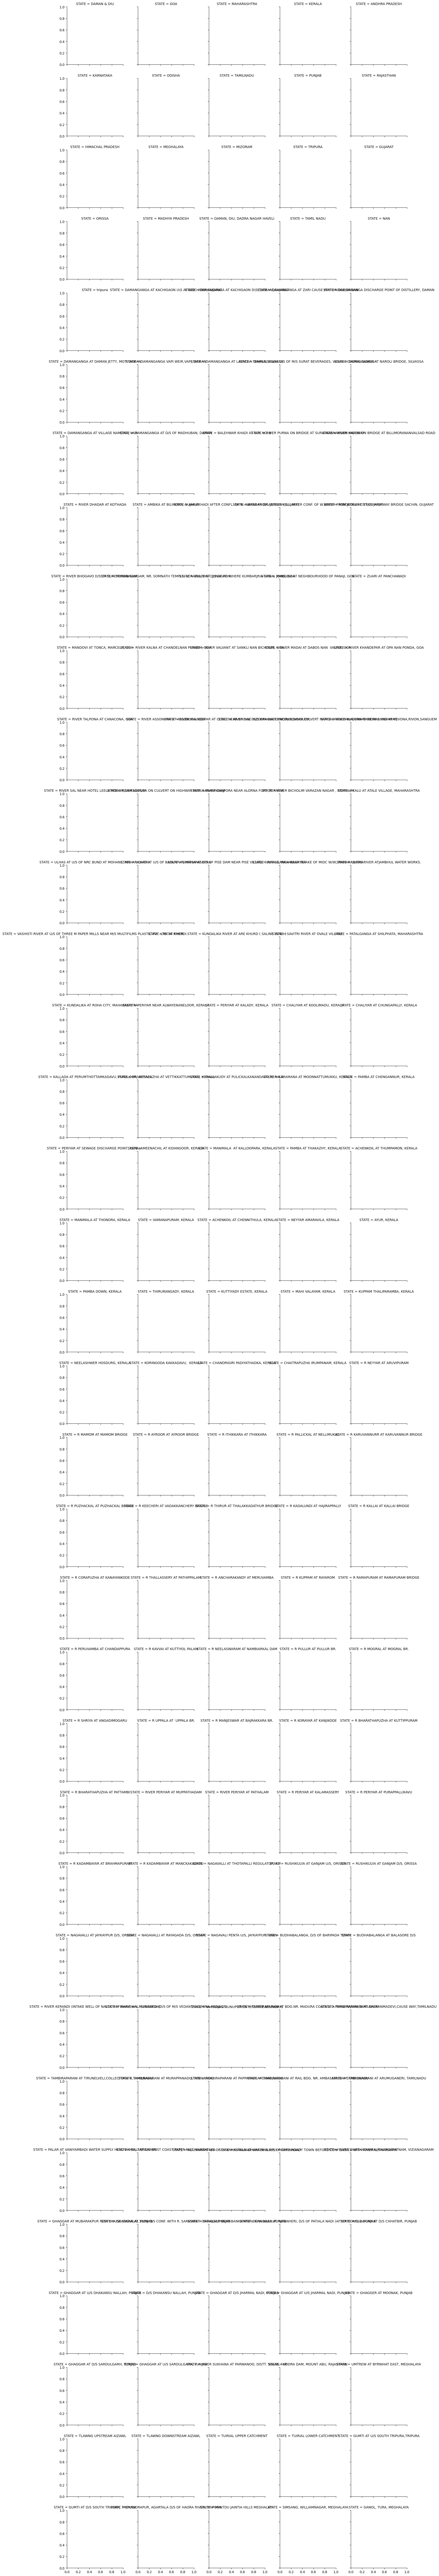

In [19]:
facet = sns.FacetGrid(subset_data, row="PH", height=3)
facet = sns.FacetGrid(water_pol_data, col="STATE", col_wrap=5, height=3)

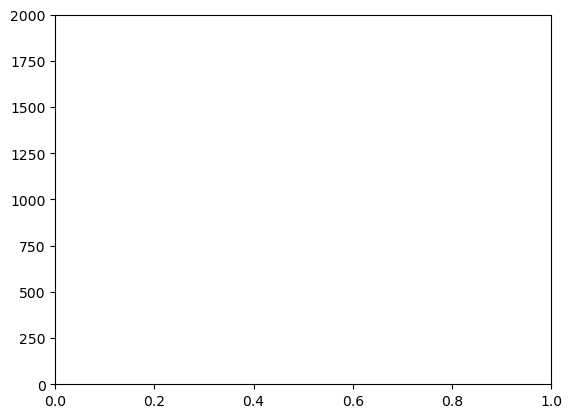

In [20]:
facet.map_dataframe(sns.barplot, x="FECAL COLIFORM (MPN/100ml)", y="TOTAL COLIFORM (MPN/100ml)Mean")
plt.ylim(0, 2000)
plt.show()

CHAPTER : 06 INTRODUCTION TO COLOR PALETTES

In [21]:
sns.set_palette('Set1')

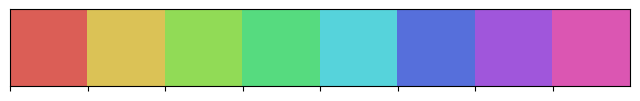

In [23]:
sns.palplot(sns.color_palette('hls',8))
plt.show()

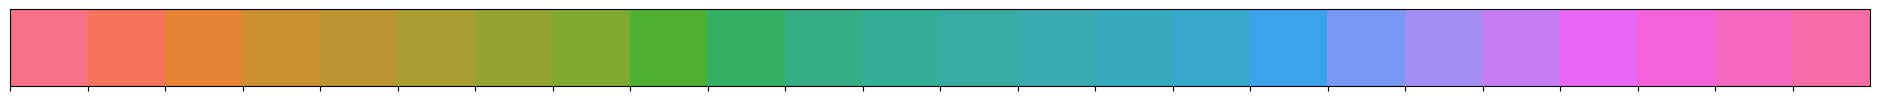

In [32]:
palette = sns.color_palette("husl", 24)  
sns.palplot(palette)
plt.show()

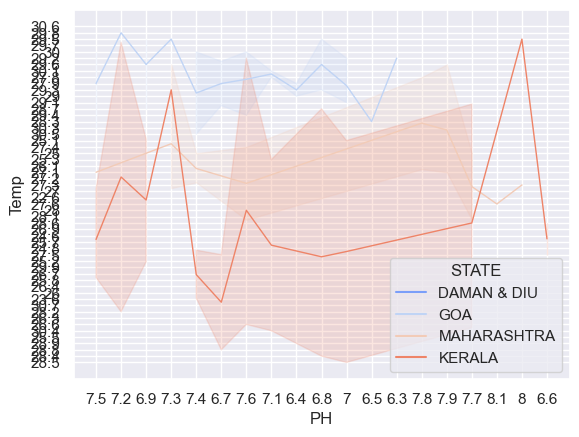

In [69]:
ax = sns.lineplot(
    x="PH", 
    y="Temp", 
    hue="STATE", 
    lw=1, 
    data=water_pol_data[:100], 
    palette="coolwarm",
    legend="brief",
)


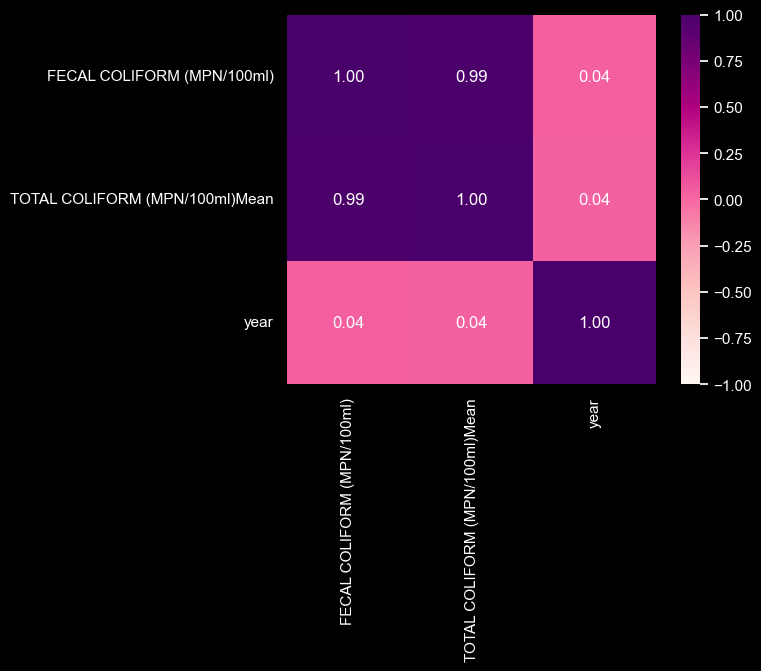

In [80]:
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(water_pol_data.corr(), vmax = 1, vmin = -1, square = True, annot = True, fmt = ".2f", cmap = "RdPu")
plt.show()

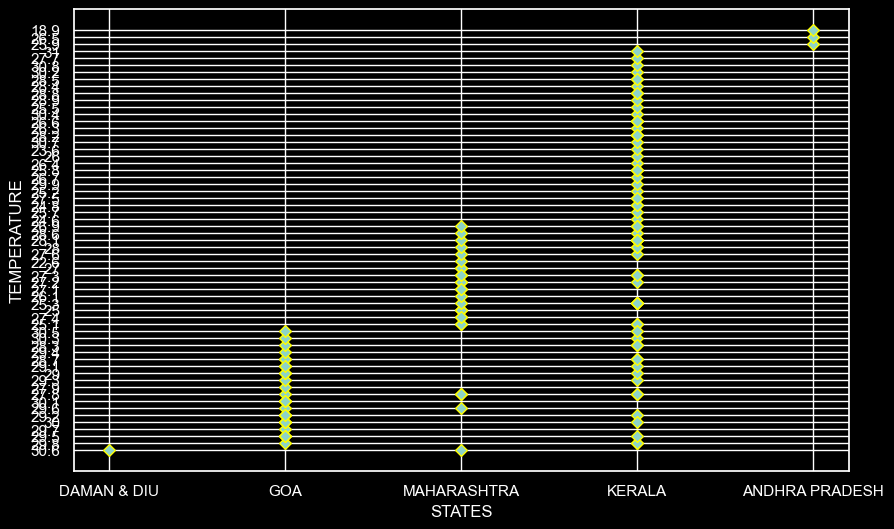

In [81]:
plt.figure(figsize=(10, 6)) 
plt.style.use("dark_background")
plt.scatter("STATE", "Temp" , marker="D", edgecolors = "yellow", cmap="PH",
             data=water_pol_data[:130])
plt.xlabel("STATES")
plt.ylabel("TEMPERATURE")
plt.show()

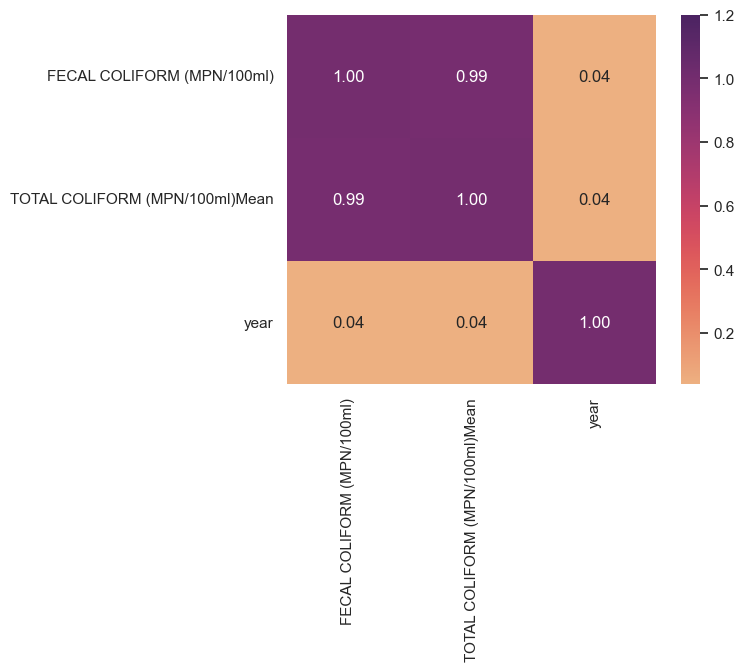

In [82]:
sns.set_style("darkgrid")
sns.heatmap(water_pol_data.corr(), vmax = 1.2, square = True, annot = True, fmt = ".2f", cmap = "flare")
plt.show()

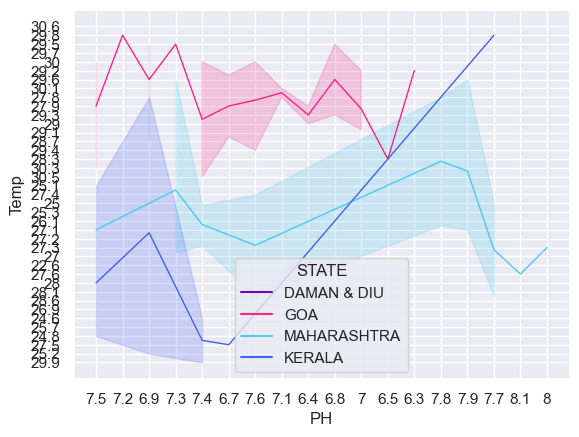

In [84]:
palette = ["#7209B7","#F72585", "#4CC9F0", "#4361EE"]
ax = sns.lineplot(
    x="PH", 
    y="Temp", 
    hue="STATE", 
    lw=1,
    data=water_pol_data[:66], 
    palette=palette,
    legend="brief"
)

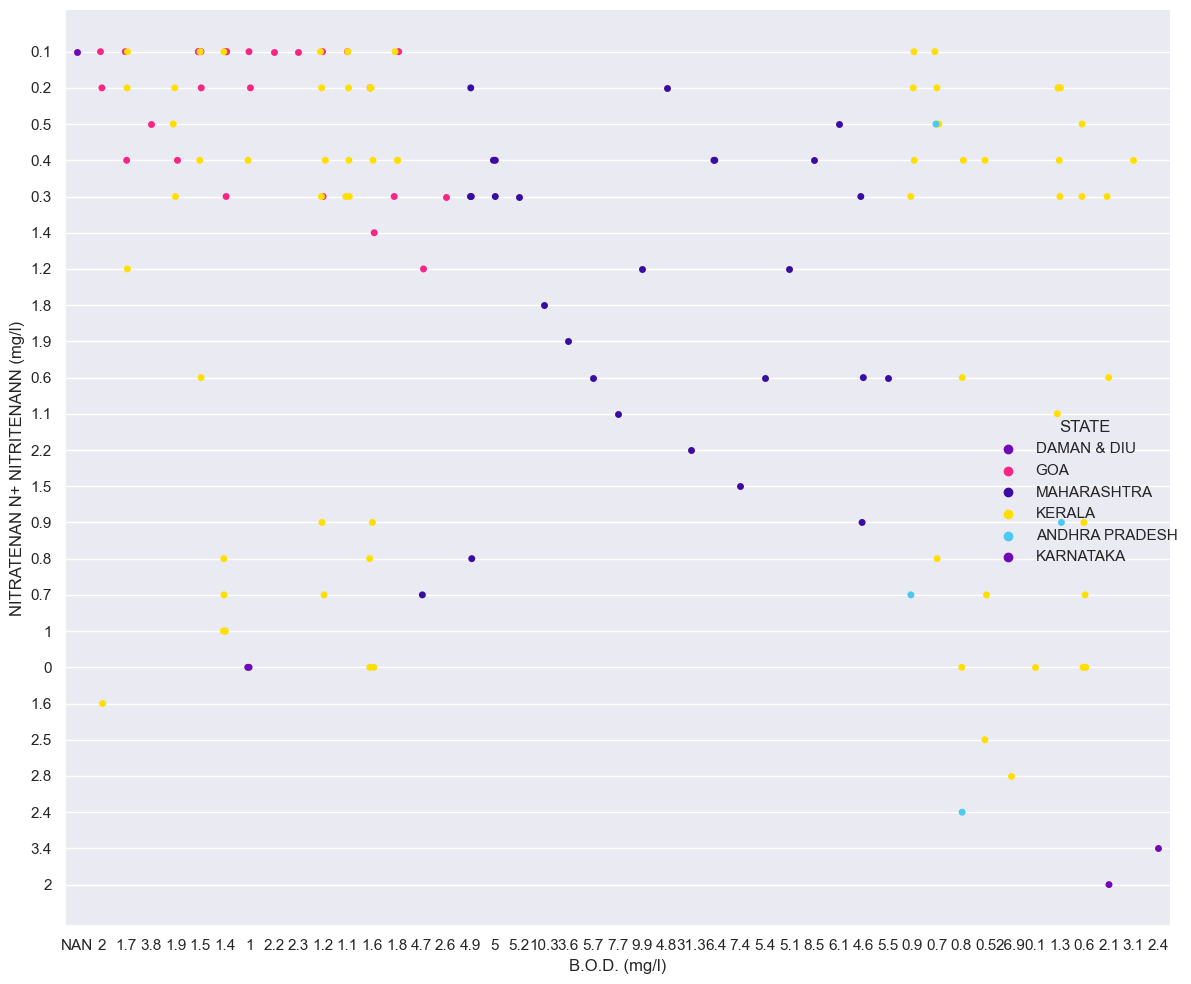

In [85]:
palette = ["#7209B7", "#F72585", "#3A0CA3", "#FFDF00", "#4CC9F0"]
sns.set()
sns.catplot(x="B.O.D. (mg/l)", y="NITRATENAN N+ NITRITENANN (mg/l)", data=water_pol_data[:135], palette=palette, hue = "STATE",
           height = 10, aspect = 1)
plt.tight_layout()

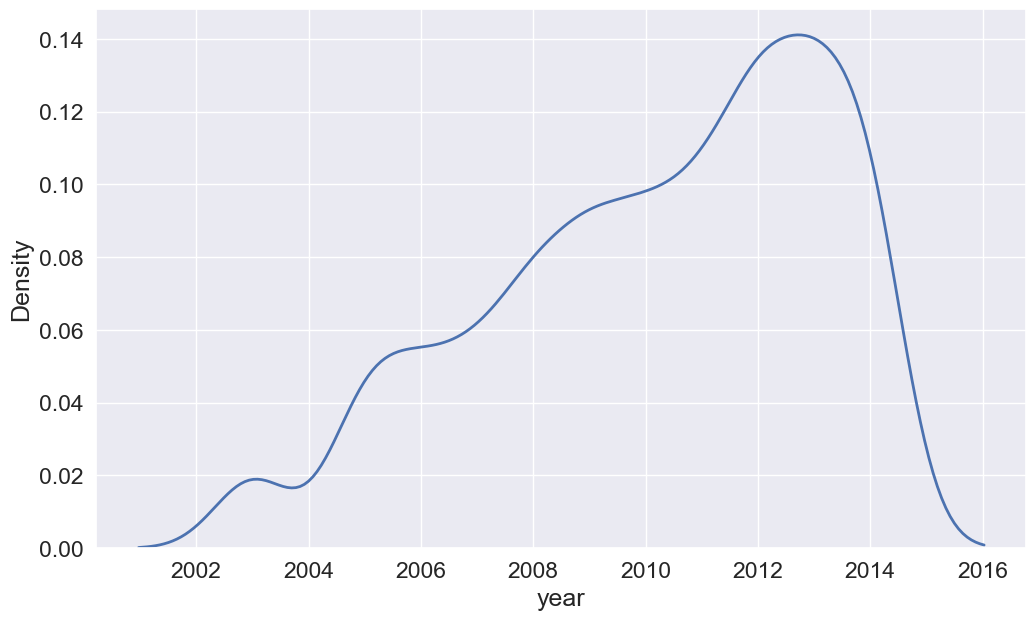

In [103]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
plt.figure(figsize=(12, 7))
water_pol_data["PH"] = pd.to_numeric(water_pol_data["PH"], errors='coerce')
#sns.kdeplot(water_pol_data["PH"])
sns.kdeplot(water_pol_data["year"])
plt.show()